457.1428571428569
[ 2.20885542e+03  1.58187633e+00 -8.42083768e-01]


Text(0, 0.5, 'Counts')

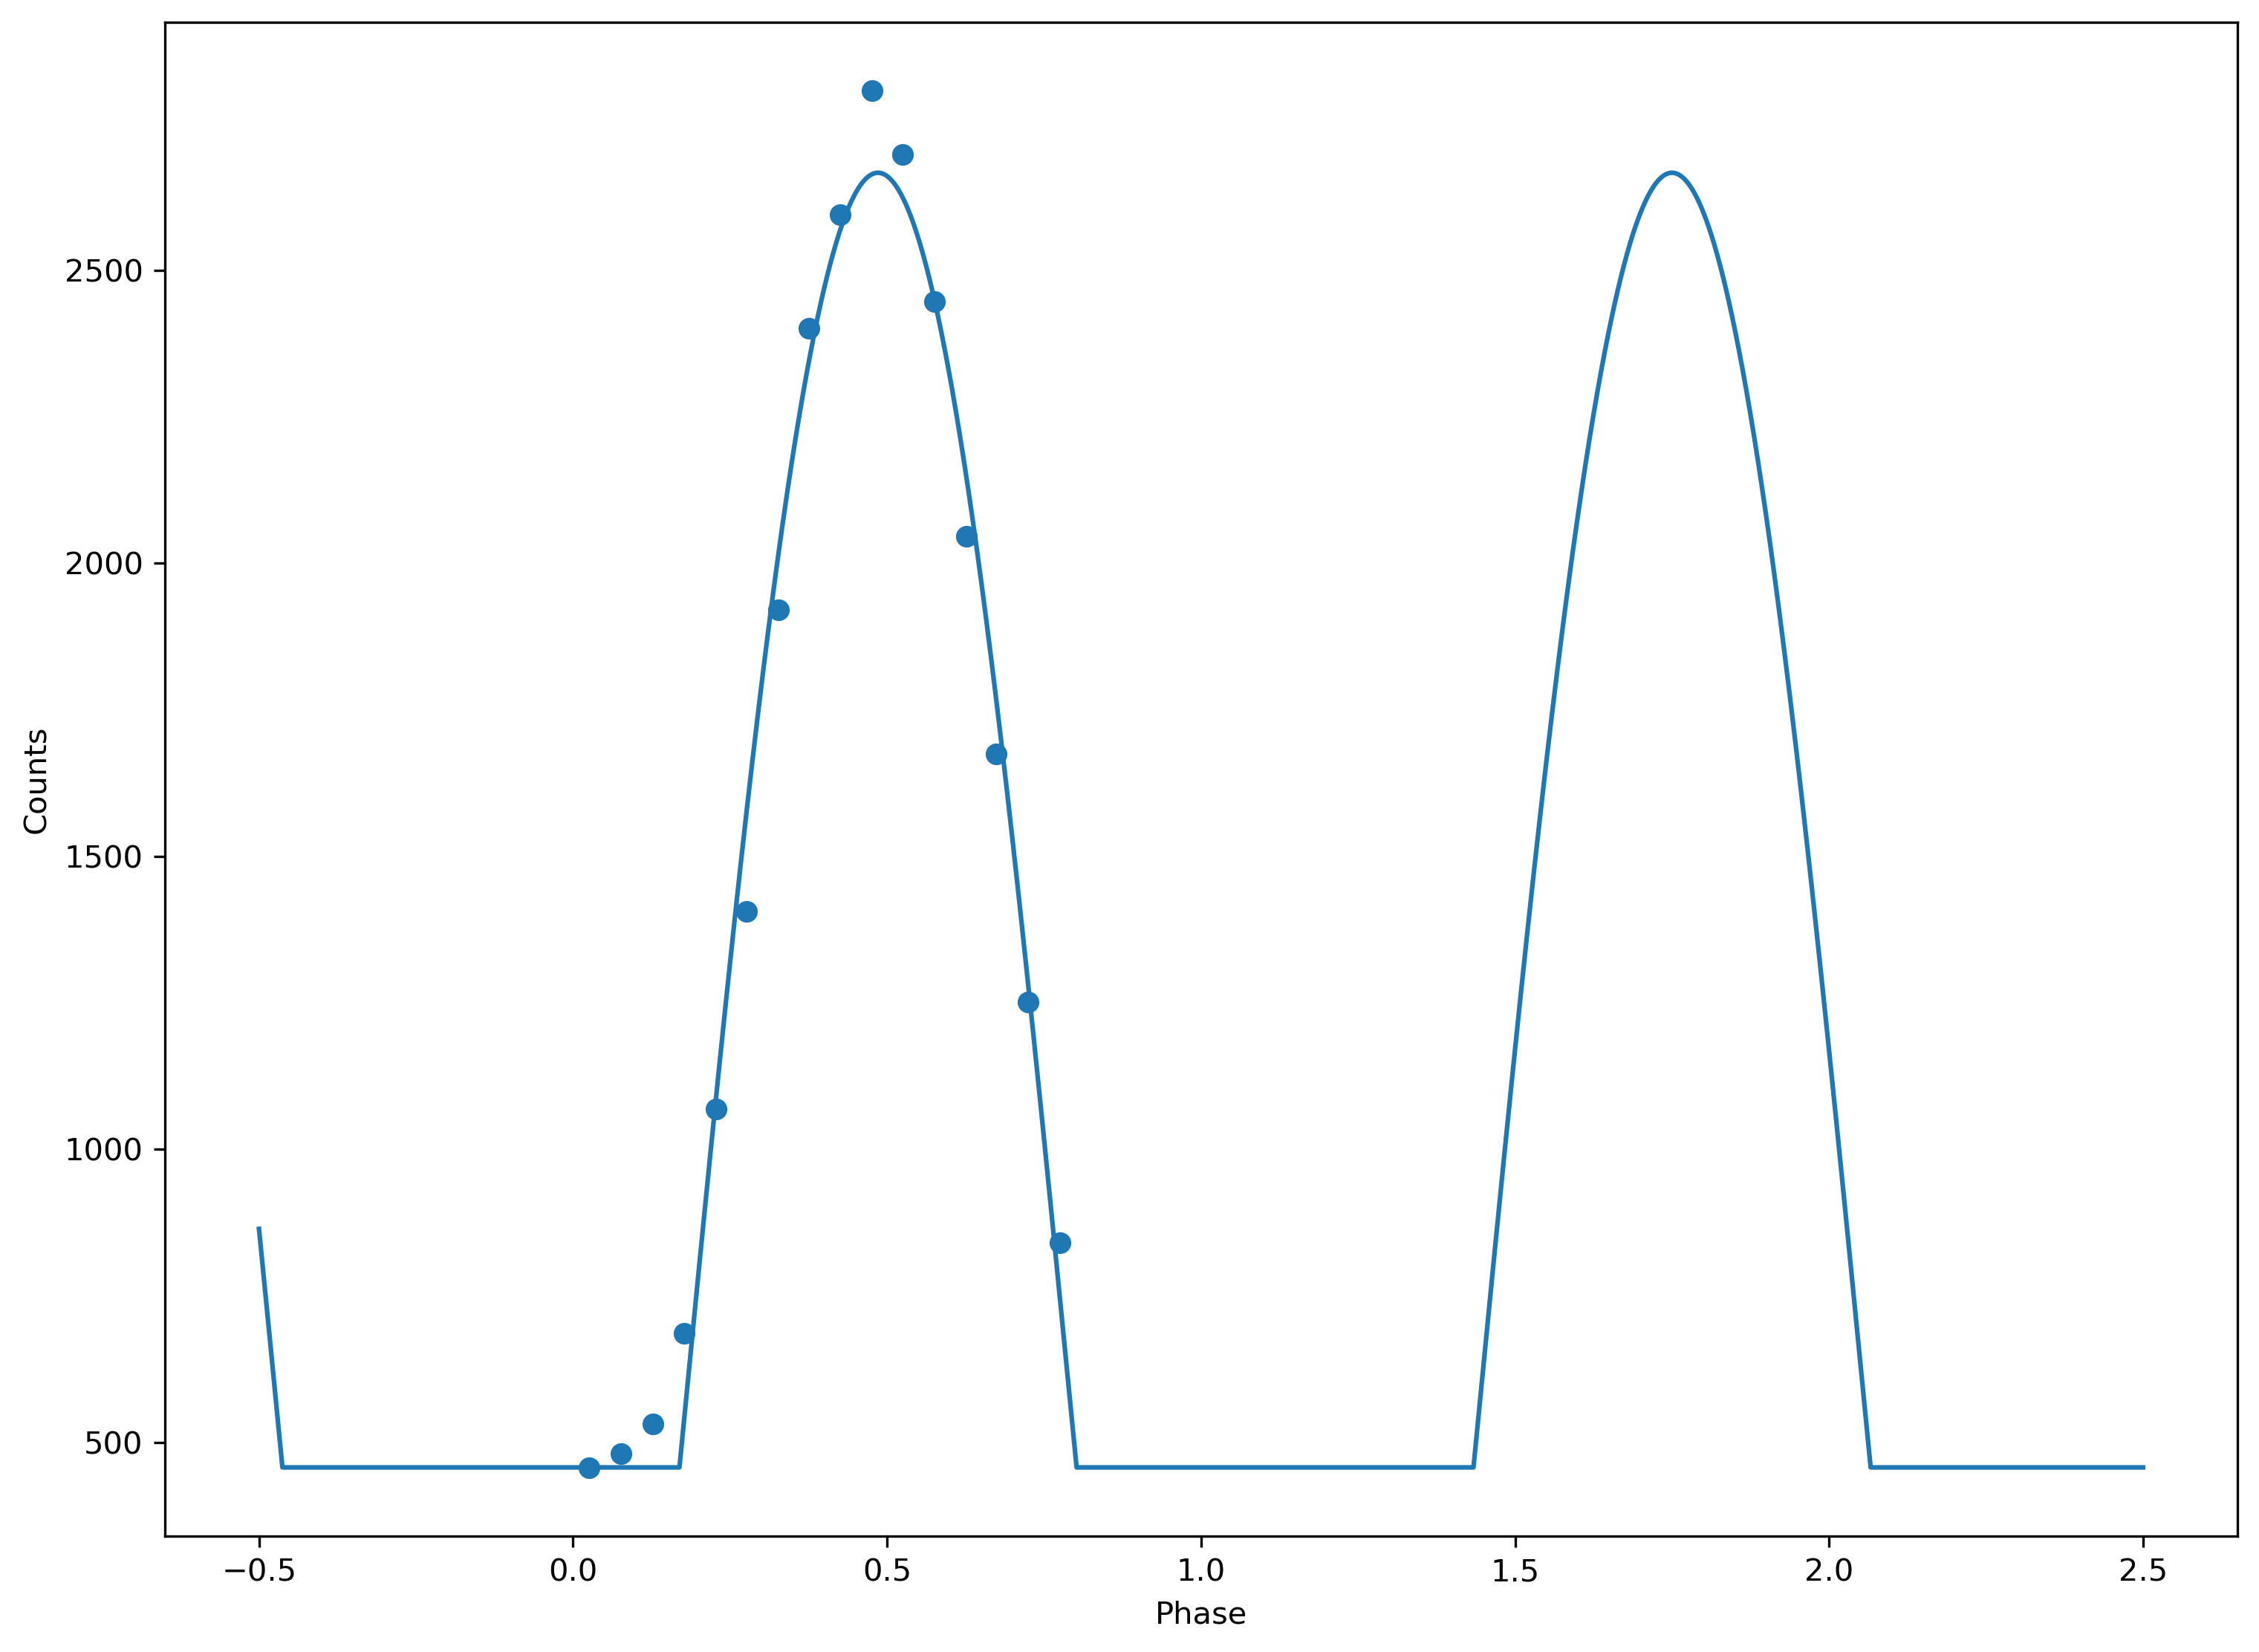

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
x_data = x_data[0:16]
y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([4600, 2, -0.5])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c):
    return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + 457.1428571428569

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
print(paramater_optimal)
fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2])



fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.plot(x, fitting)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')